<a href="https://colab.research.google.com/github/PedroMSaraiva/OOP/blob/master/FreioCarro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Padrão Comportamental Strategy



Esses codigo é um exemplo do tipo comportamental strategy. Irei seguir algumas partes o diagrama UML de classes a seguir:

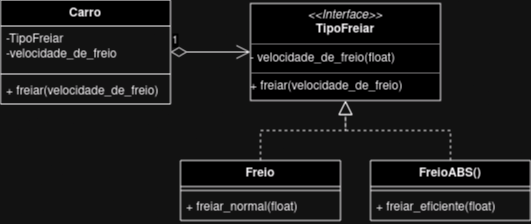

Isso esta disponivel no [github](https://github.com/PedroMSaraiva/OOP) também. Não seguirei o diagrama a risca, apenas vou mostrar o principais blocos de codigo

In [ ]:
from abc import ABC, abstractmethod

---
## Criação da Interface Strategy

In [ ]:
# Interface Strategy
class TipoFreiar(ABC):
    @abstractmethod
    def freiar(self, velocidade_de_freio: float):
        #Método abstrato para definir a estratégia de frenagem.
        pass


---
## Criação das Estrategias a serem seguidas

In [ ]:
# Concrete Strategy 1
class Freio(TipoFreiar):
    def freiar(self, velocidade_de_freio: float):
        #Implementação da estratégia de frenagem normal
        return self.freiar_normal(velocidade_de_freio)

    def freiar_normal(self, velocidade_de_freio: float):
        print(f"Freiando normalmente a {velocidade_de_freio}m/s².")

# Concrete Strategy 2
class FreioABS(TipoFreiar):

    def freiar(self, velocidade_de_freio: float):
        #Implementação da estratégia de frenagem com ABS.
        return self.freiar_eficiente(velocidade_de_freio)

    def freiar_eficiente(self, velocidade_de_freio: float):
        print(f"Freiando eficientemente a {velocidade_de_freio}m/s² com ABS.")

---
## Criação do Context

In [ ]:
# Context
class Carro:
    def __init__(self, tipo_freiar: TipoFreiar):
        self._tipo_freiar = tipo_freiar

    def freiar(self, velocidade_de_freio: float):
        #Método para realizar a frenagem usando a estratégia atual.
        self._tipo_freiar.freiar(velocidade_de_freio)

    @property
    def tipo_freiar(self) -> TipoFreiar:
        #Getter para o tipo de frenagem.
        return self._tipo_freiar

    @tipo_freiar.setter
    def tipo_freiar(self, tipo_freiar: TipoFreiar):
        #Setter para alterar o tipo de frenagem.
        self._tipo_freiar = tipo_freiar

---
função `main` para testar o codigo

In [ ]:
# Client code
if __name__ == "__main__":
    # O carro pode mudar de estratégia em tempo de execução.
    carro = Carro(Freio())
    carro.freiar(5.0) # Uso da estratégia inicial (Freio normal)

    carro._tipo_freiar = FreioABS() # Mudança de estratégia para FreioABS
    carro.freiar(7.0) # Uso da nova estratégia (FreioABS)
